In [2]:
# import modules 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
paris = pd.read_csv('paris_onemonth.csv')

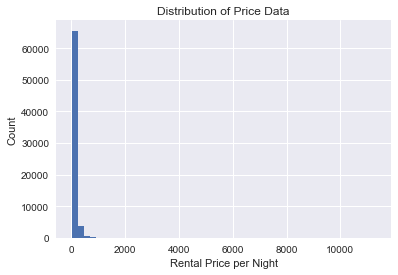

In [4]:
# examine price data

plt.hist(paris.price, bins = 50)
plt.title('Distribution of Price Data')
plt.xlabel('Rental Price per Night')
plt.ylabel('Count')
plt.show()

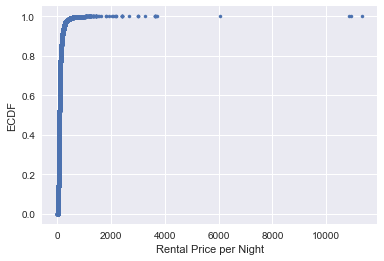

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x,y


x, y = ecdf(paris.price)

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Rental Price per Night')
plt.ylabel('ECDF')
plt.show()


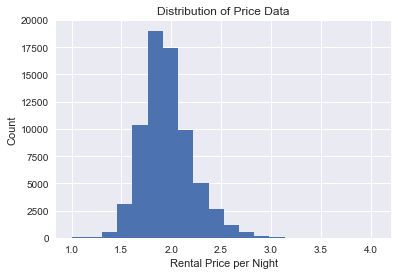

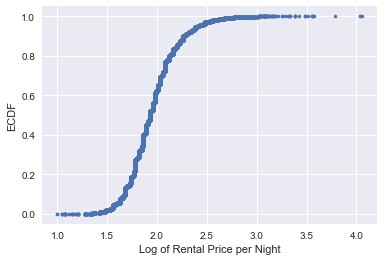

In [6]:
x_log, y_log = ecdf(paris.log_price)

plt.hist(paris.log_price, bins = 20)
plt.title('Distribution of Price Data')
plt.xlabel('Rental Price per Night')
plt.ylabel('Count')
plt.show()

plt.plot(x_log, y_log, marker='.', linestyle='none')
plt.xlabel('Log of Rental Price per Night')
plt.ylabel('ECDF')
plt.show()

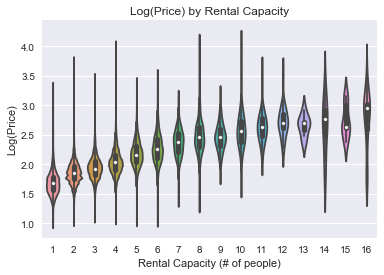

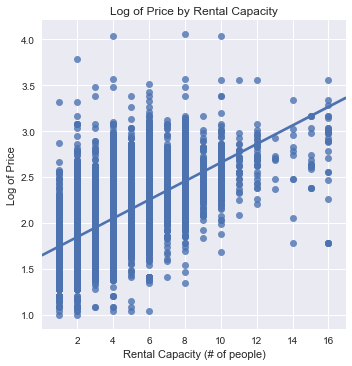

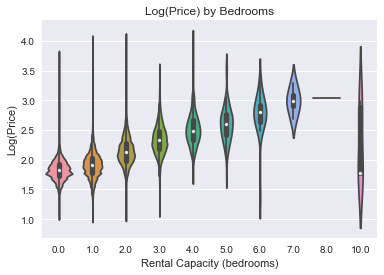

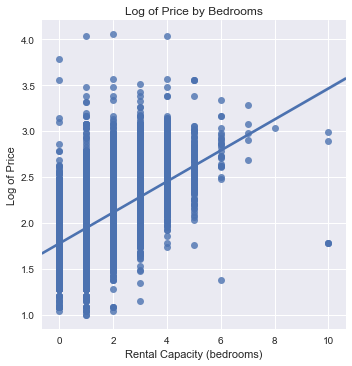

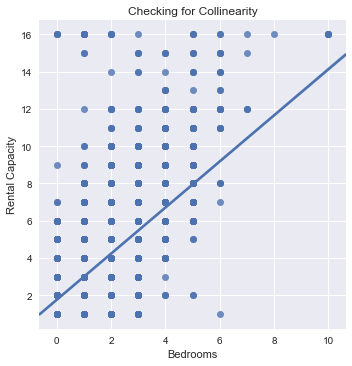

In [7]:
# examine rental capacity 
sns.violinplot(paris.accommodates, paris.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (# of people)')
plt.title('Log(Price) by Rental Capacity')
plt.show()

sns.lmplot(x='accommodates', y='log_price', data=paris, fit_reg=True, legend=True)
plt.xlabel('Rental Capacity (# of people)')
plt.ylabel('Log of Price')
plt.title('Log of Price by Rental Capacity')
sns.plt.show()


sns.violinplot(paris.bedrooms, paris.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (bedrooms)')
plt.title('Log(Price) by Bedrooms')
plt.show()

sns.lmplot(x='bedrooms', y='log_price', data=paris, fit_reg=True, legend=True)
plt.xlabel('Rental Capacity (bedrooms)')
plt.ylabel('Log of Price')
plt.title('Log of Price by Bedrooms')
sns.plt.show()

sns.lmplot(x='bedrooms', y='accommodates', data=paris, fit_reg=True, legend=True)
plt.xlabel('Bedrooms')
plt.ylabel('Rental Capacity')
plt.title('Checking for Collinearity')
sns.plt.show()

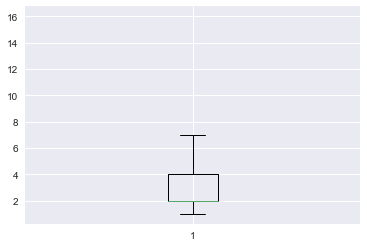

In [9]:
# remove outliers
plt.boxplot(paris.accommodates)
plt.show()
paris = paris[paris.accommodates < 7]

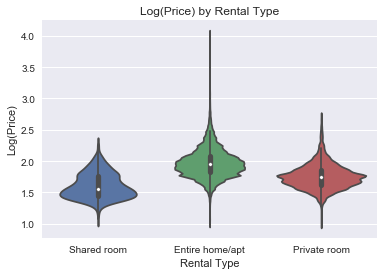

In [10]:
# room type

sns.violinplot(paris.room_type, paris.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Type')
plt.title('Log(Price) by Rental Type')
plt.show()

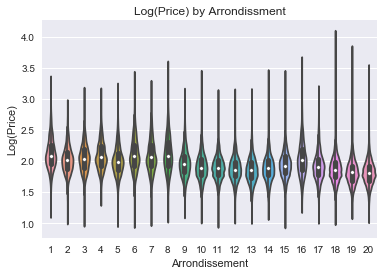

In [11]:
# examine arrondissements

sns.violinplot(paris.arrondissement, paris.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Arrondissement')
plt.title('Log(Price) by Arrondissment')
plt.show()

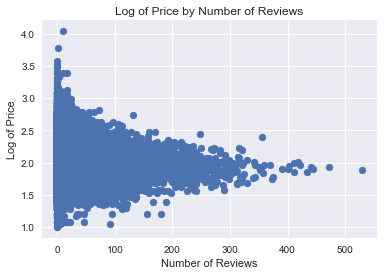

In [12]:
# examine reviews 
plt.scatter(paris.reviews, paris.log_price)
plt.xlabel('Number of Reviews')
plt.ylabel('Log of Price')
plt.title('Log of Price by Number of Reviews')
plt.show()

In [13]:
# split data into listings with reviews and those without 

paris_rev = paris[paris['reviews'] > 0]
paris_notrev = paris[paris['reviews'] == 0]

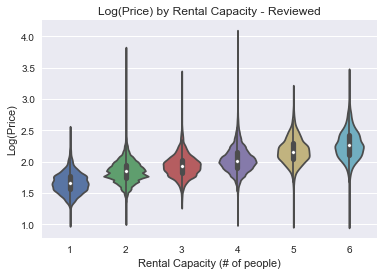

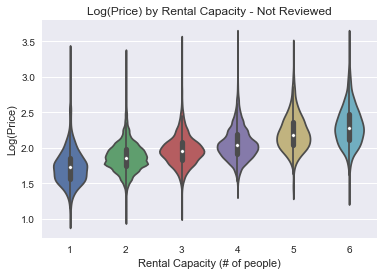

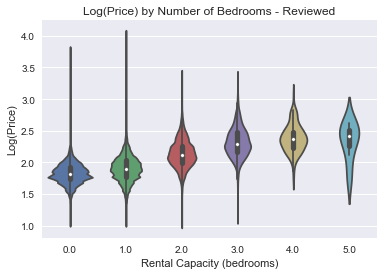

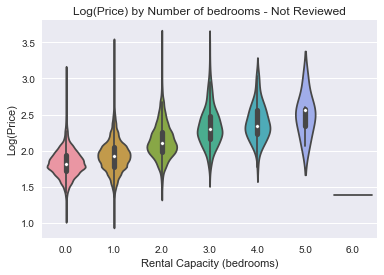

In [14]:
# examine rental capacity 
sns.violinplot(paris_rev.accommodates, paris_rev.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (# of people)')
plt.title('Log(Price) by Rental Capacity - Reviewed')
plt.show()

# examine rental capacity 
sns.violinplot(paris_notrev.accommodates, paris_notrev.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (# of people)')
plt.title('Log(Price) by Rental Capacity - Not Reviewed')
plt.show()


# bedrooms 
sns.violinplot(paris_rev.bedrooms, paris_rev.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (bedrooms)')
plt.title('Log(Price) by Number of Bedrooms - Reviewed')
plt.show()

sns.violinplot(paris_notrev.bedrooms, paris_notrev.log_price)
plt.ylabel('Log(Price)')
plt.xlabel('Rental Capacity (bedrooms)')
plt.title('Log(Price) by Number of bedrooms - Not Reviewed')
plt.show()

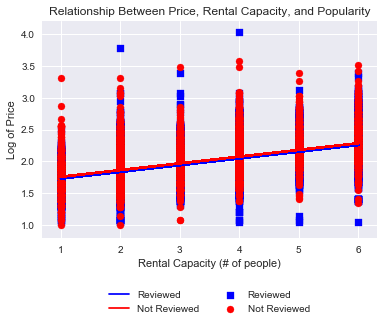

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(paris_rev.accommodates, paris_rev.log_price, c='b', marker="s", label='Reviewed')
m, b = np.polyfit(paris_rev.accommodates, paris_rev.log_price, 1)
ax1.plot(paris_rev.accommodates, m*paris_rev.accommodates + b, '-', c = 'b', label = 'Reviewed')
ax1.scatter(paris_notrev.accommodates, paris_notrev.log_price, c='r', marker="o", label='Not Reviewed')
l, p = np.polyfit(paris_notrev.accommodates, paris_notrev.log_price, 1)
ax1.plot(paris_notrev.accommodates, l*paris_notrev.accommodates + p, '-', c = 'r', label = 'Not Reviewed')
plt.title('Relationship Between Price, Rental Capacity, and Popularity')
plt.xlabel('Rental Capacity (# of people)')
plt.ylabel('Log of Price')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.show()

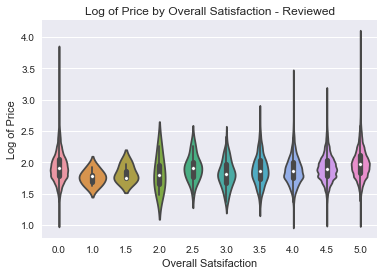

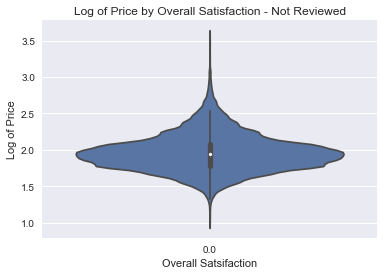

In [16]:
sns.violinplot(paris_rev.overall_satisfaction, paris_rev.log_price)
plt.xlabel('Overall Satsifaction')
plt.ylabel('Log of Price')
plt.title('Log of Price by Overall Satisfaction - Reviewed')
plt.show()

sns.violinplot(paris_notrev.overall_satisfaction, paris_notrev.log_price)
plt.xlabel('Overall Satsifaction')
plt.ylabel('Log of Price')
plt.title('Log of Price by Overall Satisfaction - Not Reviewed')
plt.show()

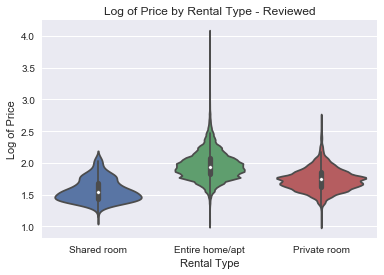

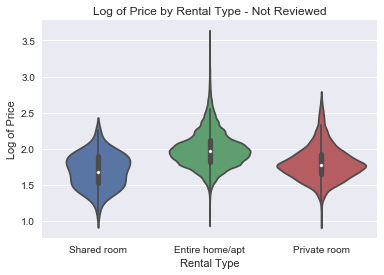

In [17]:
sns.violinplot(paris_rev.room_type, paris_rev.log_price)
plt.ylabel('Log of Price')
plt.xlabel('Rental Type')
plt.title('Log of Price by Rental Type - Reviewed')
plt.show()

sns.violinplot(paris_notrev.room_type, paris_notrev.log_price)
plt.ylabel('Log of Price')
plt.xlabel('Rental Type')
plt.title('Log of Price by Rental Type - Not Reviewed')
plt.show()

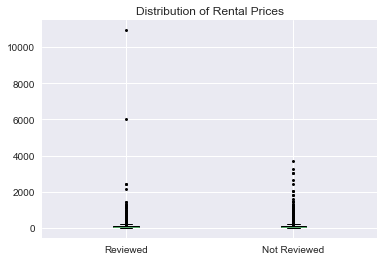

In [18]:
plt.boxplot([paris_rev.price, paris_notrev.price], sym='k.')
plt.xticks([1, 2], ['Reviewed', 'Not Reviewed'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

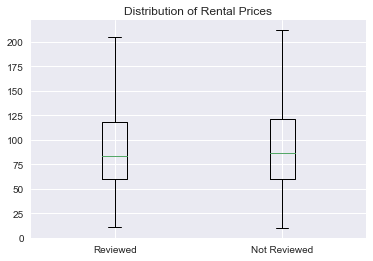

In [19]:
plt.boxplot([paris_rev.price, paris_notrev.price], showfliers=False, sym='k.')
plt.xticks([1, 2], ['Reviewed', 'Not Reviewed'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

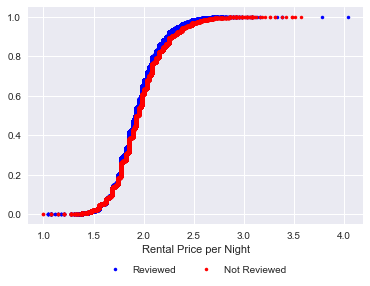

In [20]:
x_rev, y_rev = ecdf(paris_rev.log_price)
x_nr, y_nr = ecdf(paris_notrev.log_price)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x_rev, y_rev, marker='.', linestyle='none', c='b', label='Reviewed')
ax1.plot(x_nr, y_nr, marker='.', linestyle='none', c = 'r', label = 'Not Reviewed')
plt.xlabel('Rental Price per Night')
#plt.ylabel('ECDF')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

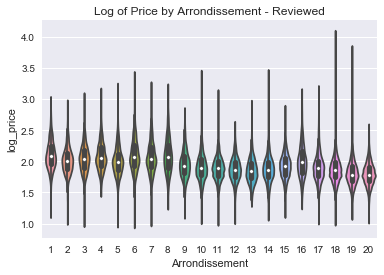

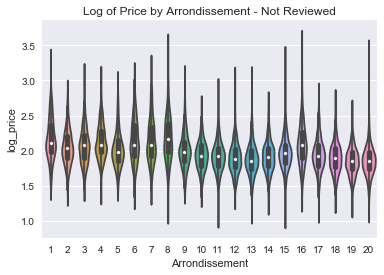

In [21]:
sns.violinplot(paris_rev.arrondissement, paris_rev.log_price)
plt.xlabel('Arrondissement')
# plt.ylabel('Log Price')
plt.title('Log of Price by Arrondissement - Reviewed')
plt.show()

sns.violinplot(paris_notrev.arrondissement, paris_notrev.log_price)
plt.xlabel('Arrondissement')
# plt.ylabel('Log Price')
plt.title('Log of Price by Arrondissement - Not Reviewed')
plt.show()

In [22]:
# linear regression - reviewed vs not reviewed 

paris.columns
X = paris_rev[['room_type', 'accommodates', 'arrondissement', 'bedrooms']]

In [23]:
X = pd.get_dummies(X, columns = ['arrondissement', 'room_type'])


In [24]:
X = X.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [25]:
X_nr = paris_notrev[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]
X_nr= pd.get_dummies(X_nr, columns = ['room_type', 'arrondissement'])


In [26]:
X_nr = X_nr.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [27]:
# regression  - rentals that have been reviewed 

import statsmodels.api as sm
from statsmodels.formula.api import ols

# add constant 
X = sm.add_constant(X)

y_rev = paris_rev.log_price

lm_rev = sm.OLS(y_rev, X).fit()

print(lm_rev.summary())

/Users/sarahjordan/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     2570.
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:13:34   Log-Likelihood:                 21871.
No. Observations:               49845   AIC:                        -4.369e+04
Df Residuals:                   49821   BIC:                        -4.348e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [28]:
coef_rev = []
for i in lm_rev.params:
    coef_rev.append(i)

se_rev = []
for i in lm_rev.bse:
    se_rev.append(i)
    
    
review_df = pd.DataFrame()
review_df['variable'] = X.columns

review_df['coefficients_rev'] = coef_rev

review_df['se_rev'] = se_rev

In [29]:
review_df.head()

,variable,coefficients_rev,se_rev
0,const,1.569532,0.003503
1,accommodates,0.053687,0.000759
2,bedrooms,0.103731,0.001252
3,arrondissement_1,0.273153,0.005461
4,arrondissement_2,0.190759,0.004853


In [30]:
# regression - rentals that have not been reviewed 

X_nr = sm.add_constant(X_nr)

y_nr = paris_notrev.log_price

lm_nr = sm.OLS(y_nr, X_nr).fit()

print(lm_nr.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     686.4
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:13:37   Log-Likelihood:                 4657.0
No. Observations:               18740   AIC:                            -9266.
Df Residuals:                   18716   BIC:                            -9078.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [31]:
coef_nr = []
for i in lm_nr.params:
    coef_nr.append(i)

se_nr = []
for i in lm_nr.bse:
    se_nr.append(i)
    
       
nr_df = pd.DataFrame()
nr_df['variable'] = X_nr.columns

nr_df['coefficients_nr'] = coef_nr

nr_df['se_nr'] = se_nr



In [32]:
nr_rev_df = review_df.merge(nr_df)

nr_rev_df

,variable,coefficients_rev,se_rev,coefficients_nr,se_nr
0,const,1.569532,0.003503,1.597168,0.006391
1,accommodates,0.053687,0.000759,0.053353,0.001502
2,bedrooms,0.103731,0.001252,0.105714,0.002336
3,arrondissement_1,0.273153,0.005461,0.309433,0.012524
4,arrondissement_2,0.190759,0.004853,0.205278,0.010908
5,arrondissement_3,0.218398,0.004316,0.219133,0.009413
6,arrondissement_4,0.255331,0.004591,0.271265,0.010274
7,arrondissement_5,0.187181,0.004661,0.172682,0.009995
8,arrondissement_6,0.268506,0.004787,0.290156,0.010046
9,arrondissement_7,0.249433,0.004957,0.287926,0.009827


In [33]:
def z_score(B1, B2, se1, se2):
    numerator = B1 - B2
    inner_denom = np.abs(np.power(se1,2) - np.power(se2, 2))
    denominator = np.power(inner_denom, 0.5)
    zscore = numerator / denominator
    return zscore

nr_rev_df['zscore'] = z_score(nr_rev_df.coefficients_nr, nr_rev_df.coefficients_rev, nr_rev_df.se_nr, nr_rev_df.se_rev)

nr_rev_df

,variable,coefficients_rev,se_rev,coefficients_nr,se_nr,zscore
0,const,1.569532,0.003503,1.597168,0.006391,5.169740
1,accommodates,0.053687,0.000759,0.053353,0.001502,-0.257734
2,bedrooms,0.103731,0.001252,0.105714,0.002336,1.005082
3,arrondissement_1,0.273153,0.005461,0.309433,0.012524,3.218965
4,arrondissement_2,0.190759,0.004853,0.205278,0.010908,1.486159
5,arrondissement_3,0.218398,0.004316,0.219133,0.009413,0.087923
6,arrondissement_4,0.255331,0.004591,0.271265,0.010274,1.733746
7,arrondissement_5,0.187181,0.004661,0.172682,0.009995,-1.639959
8,arrondissement_6,0.268506,0.004787,0.290156,0.010046,2.451123
9,arrondissement_7,0.249433,0.004957,0.287926,0.009827,4.536951


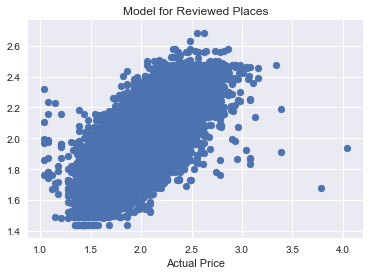

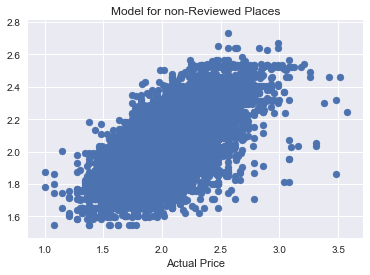

In [34]:
plt.scatter(paris_rev.log_price, lm_rev.predict(X))
plt.xlabel('Actual Price')
#plt.ylabel('Model Predicted Price')
plt.title('Model for Reviewed Places')
plt.show()

plt.scatter(paris_notrev.log_price, lm_nr.predict(X_nr))
plt.xlabel('Actual Price')
#plt.ylabel('Model Predicted Price')
plt.title('Model for non-Reviewed Places')
plt.show()

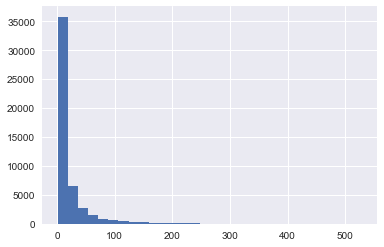

In [35]:
# Split by high reviews, low reviews

plt.hist(paris_rev.reviews, bins=30)
plt.show()

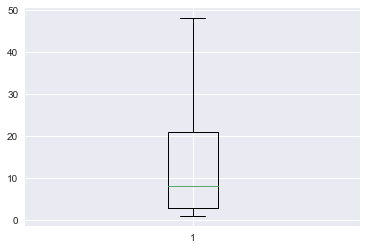

In [36]:
plt.boxplot(paris_rev.reviews.values, showfliers=False)
plt.show()

In [37]:
np.percentile(paris_rev.reviews, 25)

3.0

In [38]:
np.percentile(paris_rev.reviews, 50)

8.0

In [39]:
np.percentile(paris_rev.reviews, 75)

21.0

In [40]:
np.percentile(paris_rev.reviews, 95)

83.0

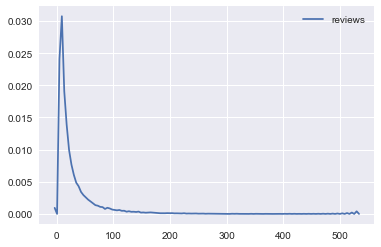

In [41]:
sns.kdeplot(paris_rev.reviews)
plt.show()

In [42]:
# split data into high and low number of reviews based on 50th percentile 
paris_avg = paris_rev[paris_rev['reviews'] <= 8]
paris_plus = paris_rev[paris_rev['reviews'] > 8]

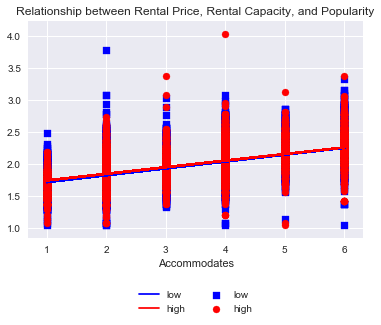

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(paris_avg.accommodates, paris_avg.log_price, c='b', marker="s", label='low')
m, b = np.polyfit(paris_avg.accommodates, paris_avg.log_price, 1)
ax1.plot(paris_avg.accommodates, m*paris_avg.accommodates + b, '-', c = 'b', label = 'low')
ax1.scatter(paris_plus.accommodates, paris_plus.log_price, c='r', marker="o", label='high')
l, p = np.polyfit(paris_plus.accommodates, paris_plus.log_price, 1)
ax1.plot(paris_plus.accommodates, l*paris_plus.accommodates + p, '-', c = 'r', label = 'high')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.title('Relationship between Rental Price, Rental Capacity, and Popularity')
plt.xlabel('Accommodates')
# plt.ylabel('Log of Price')
plt.show()

In [44]:
# regression  - 50th percentile 

X_bavg = paris_avg[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]

X_bavg = pd.get_dummies(X_bavg, columns = ['room_type', 'arrondissement'])

X_bavg = X_bavg.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [45]:
X_bavg = sm.add_constant(X_bavg)

y_bavg = paris_avg.log_price

lm_bavg = sm.OLS(y_bavg, X_bavg).fit()

print(lm_bavg.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1261.
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:13:46   Log-Likelihood:                 10453.
No. Observations:               26153   AIC:                        -2.086e+04
Df Residuals:                   26129   BIC:                        -2.066e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [46]:
coef_bavg = []
for i in lm_bavg.params:
    coef_bavg.append(i)

se_bavg = []
for i in lm_bavg.bse:
    se_bavg.append(i)
    
       
bavg_df = pd.DataFrame()
bavg_df['variable'] = X_bavg.columns

bavg_df['coefficients_bavg'] = coef_bavg

bavg_df['se_bavg'] = se_regular

NameError: name 'se_regular' is not defined

In [47]:
X_aavg = paris_plus[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]
X_aavg = pd.get_dummies(X_aavg, columns = ['room_type', 'arrondissement'])
X_aavg = X_aavg.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

X_aavg = sm.add_constant(X_aavg)
y_aavg = paris_plus.log_price
lm_aavg = sm.OLS(y_aavg, X_aavg).fit()

print(lm_aavg.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     1327.
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:13:48   Log-Likelihood:                 11597.
No. Observations:               23692   AIC:                        -2.315e+04
Df Residuals:                   23668   BIC:                        -2.295e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [48]:
coef_aavg = []
for i in lm_aavg.params:
    coef_aavg.append(i)

se_aavg = []
for i in lm_aavg.bse:
    se_aavg.append(i)
    
       
aavg_df = pd.DataFrame()
aavg_df['variable'] = X_aavg.columns

aavg_df['coefficients_aavg'] = coef_aavg

aavg_df['se_aavg'] = se_aavg



ab_avg_df = bavg_df.merge(aavg_df)
ab_avg_df['zcore'] = z_score(ab_avg_df.coefficients_bavg, ab_avg_df.coefficients_aavg, ab_avg_df.se_bavg, ab_avg_df.se_aavg)

regular_highish_df


AttributeError: 'DataFrame' object has no attribute 'se_bavg'

In [49]:
# split data into high and low number of reviews based on 75th percentile 

paris_regular = paris_rev[paris_rev['reviews'] <= 22]
paris_highish = paris_rev[paris_rev['reviews'] > 22]

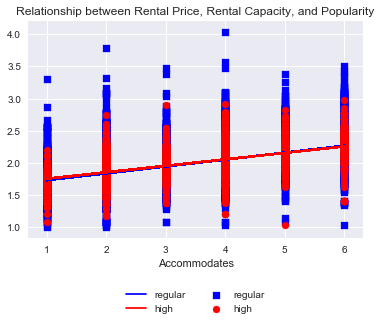

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

paris_low = paris[paris['reviews'] <= 22]
paris_reg = paris[paris['reviews'] > 22]
ax1.scatter(paris_low.accommodates, paris_low.log_price, c='b', marker="s", label='regular')
m, b = np.polyfit(paris_low.accommodates, paris_low.log_price, 1)
ax1.plot(paris_low.accommodates, m*paris_low.accommodates + b, '-', c = 'b', label = 'regular')
ax1.scatter(paris_reg.accommodates, paris_reg.log_price, c='r', marker="o", label='high')
l, p = np.polyfit(paris_reg.accommodates, paris_reg.log_price, 1)
ax1.plot(paris_reg.accommodates, l*paris_reg.accommodates + p, '-', c = 'r', label = 'high')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.title('Relationship between Rental Price, Rental Capacity, and Popularity')
plt.xlabel('Accommodates')
#plt.ylabel('Log of Price')
plt.show()

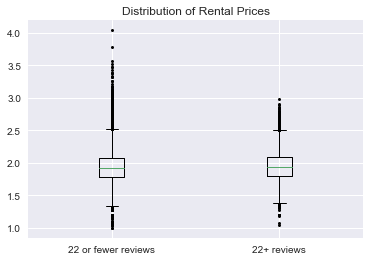

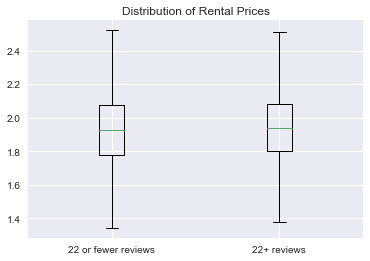

In [51]:
paris_low = paris[paris['reviews'] <= 22]
paris_reg = paris[paris['reviews'] > 22]

plt.boxplot([paris_low.log_price, paris_reg.log_price], sym='k.')
plt.xticks([1, 2], ['22 or fewer reviews', '22+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

plt.boxplot([paris_low.log_price, paris_reg.log_price], showfliers=False)
plt.xticks([1, 2], ['22 or fewer reviews', '22+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

In [52]:
X_regular = paris_regular[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]

X_regular = pd.get_dummies(X_regular, columns = ['room_type', 'arrondissement'])

X_regular = X_regular.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)


In [53]:
X_highish = paris_highish[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]

X_highish = pd.get_dummies(X_highish, columns = ['room_type', 'arrondissement'])

X_highish = X_highish.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [54]:
# regression for reviewed houses below 75th percentile
X_regular = sm.add_constant(X_regular)

y_regular = paris_regular.log_price

lm_regular = sm.OLS(y_regular, X_regular).fit()

print(lm_regular.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1922.
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:13:52   Log-Likelihood:                 15923.
No. Observations:               37936   AIC:                        -3.180e+04
Df Residuals:                   37912   BIC:                        -3.159e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [55]:
coef_regular = []
for i in lm_regular.params:
    coef_regular.append(i)

se_regular = []
for i in lm_regular.bse:
    se_regular.append(i)
    
       
regular_df = pd.DataFrame()
regular_df['variable'] = X_regular.columns

regular_df['coefficients_regular'] = coef_regular

regular_df['se_regular'] = se_regular

In [56]:
# regression for things above 75th percentile 

X_highish = sm.add_constant(X_highish)

y_highish = paris_highish.log_price

lm_highish = sm.OLS(y_highish, X_highish).fit()

print(lm_highish.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     661.1
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:13:54   Log-Likelihood:                 6107.3
No. Observations:               11909   AIC:                        -1.217e+04
Df Residuals:                   11885   BIC:                        -1.199e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [57]:
coef_highish = []
for i in lm_highish.params:
    coef_highish.append(i)

se_highish = []
for i in lm_highish.bse:
    se_highish.append(i)
    
       
highish_df = pd.DataFrame()
highish_df['variable'] = X_highish.columns

highish_df['coefficients_highish'] = coef_highish

highish_df['se_highish'] = se_highish

In [58]:
regular_highish_df = regular_df.merge(highish_df)

regular_highish_df['zcore'] = z_score(regular_highish_df.coefficients_regular, regular_highish_df.coefficients_highish,
                                     regular_highish_df.se_regular, regular_highish_df.se_highish)

regular_highish_df

,variable,coefficients_regular,se_regular,coefficients_highish,se_highish,zcore
0,const,1.564787,0.003936,1.587098,0.007974,-3.217266
1,accommodates,0.055278,0.000895,0.048634,0.001414,6.069622
2,bedrooms,0.102920,0.001449,0.106338,0.002485,-1.692613
3,room_type_Private room,-0.137764,0.002802,-0.143277,0.004526,1.551049
4,room_type_Shared room,-0.263958,0.010471,-0.341726,0.012651,10.953411
5,arrondissement_1,0.283372,0.006764,0.253816,0.009961,4.041515
6,arrondissement_2,0.194752,0.005975,0.182741,0.009157,1.730881
7,arrondissement_3,0.223052,0.005098,0.206228,0.008746,2.367292
8,arrondissement_4,0.258594,0.005591,0.247016,0.008886,1.676231
9,arrondissement_5,0.189907,0.005482,0.178619,0.009350,1.490385


In [59]:
# split data into high and low number of reviews based on 95th percentile 

paris_reg = paris[paris['reviews'] <= 82]
paris_high = paris[paris['reviews'] > 82]

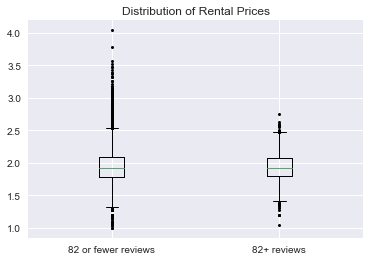

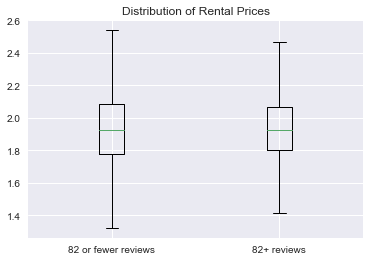

In [60]:
# examine data 

plt.boxplot([paris_reg.log_price, paris_high.log_price], sym='k.')
plt.xticks([1, 2], ['82 or fewer reviews', '82+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

plt.boxplot([paris_reg.log_price, paris_high.log_price], showfliers=False)
plt.xticks([1, 2], ['82 or fewer reviews', '82+ reviews'])
plt.ylabel = ('Price')
plt.title('Distribution of Rental Prices')
plt.show()

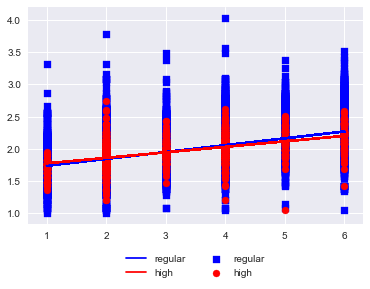

In [61]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(paris_reg.accommodates, paris_reg.log_price, c='b', marker="s", label='regular')
m, b = np.polyfit(paris_reg.accommodates, paris_reg.log_price, 1)
ax1.plot(paris_reg.accommodates, m*paris_reg.accommodates + b, '-', c = 'b', label = 'regular')
ax1.scatter(paris_high.accommodates, paris_high.log_price, c='r', marker="o", label='high')
l, p = np.polyfit(paris_high.accommodates, paris_high.log_price, 1)
ax1.plot(paris_high.accommodates, l*paris_high.accommodates + p, '-', c = 'r', label = 'high')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

In [62]:
# linear regression - rentals with high number of reviews versus typical number of reviews 

X_reg = paris_reg[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]
X_reg = pd.get_dummies(X_reg, columns = ['room_type', 'arrondissement'])

X_reg = X_reg.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [63]:
X_high = paris_high[['room_type', 'accommodates', 'bedrooms', 'arrondissement' ]]

X_high = pd.get_dummies(X_high, columns = ['room_type', 'arrondissement'])

X_high = X_high.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

In [64]:
# regression: rentals with typical number of reviews 

X_reg = sm.add_constant(X_reg)

y_reg = paris_reg.log_price

lm_reg = sm.OLS(y_reg, X_reg).fit()

print(lm_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     3028.
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:14:00   Log-Likelihood:                 24430.
No. Observations:               66077   AIC:                        -4.881e+04
Df Residuals:                   66053   BIC:                        -4.859e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [65]:
coef_reg = []
for i in lm_reg.params:
    coef_reg.append(i)

se_reg = []
for i in lm_reg.bse:
    se_reg.append(i)
    
       
reg_df = pd.DataFrame()
reg_df['variable'] = X_reg.columns

reg_df['coefficients_reg'] = coef_reg

reg_df['se_reg'] = se_reg

In [66]:
# regression - rentals with high number of reviews 

X_high = sm.add_constant(X_high)

y_high = paris_high.log_price

lm_high = sm.OLS(y_high, X_high).fit()

print(lm_high.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     102.4
Date:                Tue, 27 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:14:01   Log-Likelihood:                 1308.2
No. Observations:                2508   AIC:                            -2568.
Df Residuals:                    2484   BIC:                            -2428.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [67]:
coef_high = []
for i in lm_high.params:
    coef_high.append(i)

se_high = []
for i in lm_high.bse:
    se_high.append(i)
    
       
high_df = pd.DataFrame()
high_df['variable'] = X_high.columns

high_df['coefficients_high'] = coef_high

high_df['se_high'] = se_high

In [68]:
reg_high_df = reg_df.merge(high_df)

reg_high_df['zcore'] = z_score(reg_high_df.coefficients_reg, reg_high_df.coefficients_high,
                                     reg_high_df.se_reg, reg_high_df.se_high)

reg_high_df

,variable,coefficients_reg,se_reg,coefficients_high,se_high,zcore
0,const,1.577227,0.003156,1.598143,0.020762,-1.019254
1,accommodates,0.053788,0.000708,0.044174,0.002958,3.347394
2,bedrooms,0.105310,0.001143,0.087690,0.005512,3.267896
3,room_type_Private room,-0.128419,0.002202,-0.128363,0.009539,-0.006029
4,room_type_Shared room,-0.264742,0.007695,-0.343357,0.027746,2.949043
5,arrondissement_1,0.281616,0.005299,0.235338,0.023574,2.014660
6,arrondissement_2,0.191956,0.004676,0.182051,0.022171,0.457039
7,arrondissement_3,0.216087,0.004094,0.214437,0.021527,0.078055
8,arrondissement_4,0.259051,0.004433,0.231080,0.021361,1.338600
9,arrondissement_5,0.182008,0.004393,0.178703,0.023462,0.143407
